# Acceralation Adjusting Using fuzzy logic
Here we want to keep the distance between two cars close to a certain value (d)
system has two inputs (Error and delta), which error is deviation of d and delta is the first derivative of error, since error is changing.

Elham Razi - 9731019

in order to run this code, you need to install these modules:



```
pip install numpy
pip install -U scikit-fuzzy
pip install -U matplotlib
```



In [22]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import matplotlib.pyplot as plt

In [67]:
error = ctrl.Antecedent(np.arange(0, 301, 1), 'error')
delta = ctrl.Antecedent(np.arange(-4, 7, 1), 'delta')
output = ctrl.Consequent(np.arange(-10, 11, 1), 'output')

names = ['low', 'medium', 'high']
error.automf(names=names)
delta.automf(names=names)
output.automf(names=names)


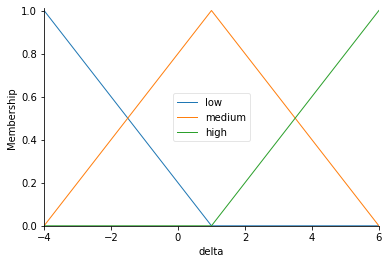

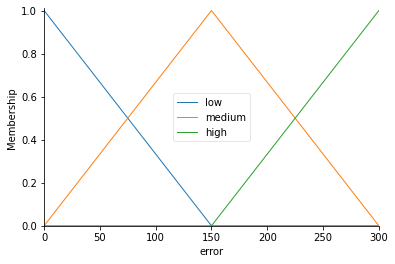

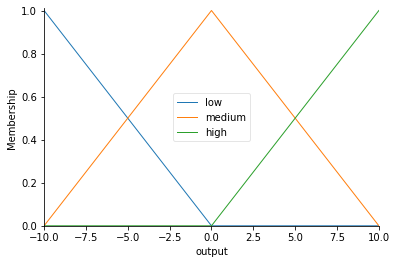

In [60]:
delta.view()
error.view()
output.view()

In [71]:
# rules are not rationally right.

rule1 = ctrl.Rule(error['low'] & delta['low'], output['medium'])
rule2 = ctrl.Rule(error['low'] & delta['medium'], output['low'])
rule3 = ctrl.Rule(error['low'] & delta['high'], output['high'])
rule4 = ctrl.Rule(error['medium'] & delta['low'], output['low'])
rule5 = ctrl.Rule(error['medium'] & delta['medium'], output['medium'])
rule6 = ctrl.Rule(error['medium'] & delta['high'], output['low'])
rule7 = ctrl.Rule(error['high'] & delta['low'], output['high'])
rule8 = ctrl.Rule(error['high'] & delta['medium'], output['low'])
rule9 = ctrl.Rule(error['high'] & delta['high'], output['high'])

In [73]:
dctrl = ctrl.ControlSystem(rules=[rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
distance_adjusting = ctrl.ControlSystemSimulation(dctrl)

-1.51998784009728


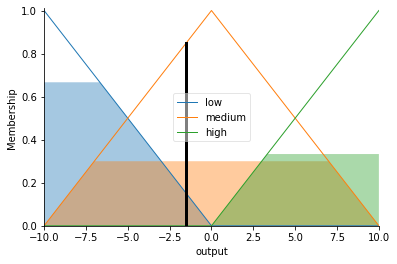

In [74]:
distance_adjusting.input['error'] = 100
distance_adjusting.input['delta'] = 4.5

# Crunch the numbers
distance_adjusting.compute()
print(distance_adjusting.output['output'])
output.view(sim=distance_adjusting)

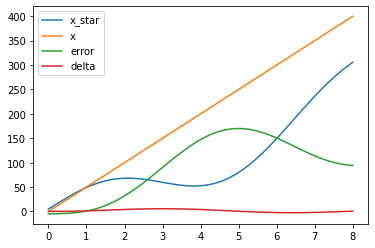

In [77]:
a = 5
v = 8
x0 = 5
t = np.linspace(0, 8, 100)
# here we have an example of how back car is moving (just an imaginary example!)
x_star = a/2 * t**2.1 + v * t + x0 + 40 * np.sin(t)
# plot the function
plt.plot(t,x_star, label='x_star')

# front car
v1 = 50
x = v1 * t
plt.plot(t, x, label='x')
err = x - x_star
dlt = ((v1 - v) - a * t - 40 * np.cos(t)) / 12
plt.plot(t, err, label='error')
plt.plot(t, dlt, label='delta')
# show the plot
plt.legend()
plt.show()

در این جا ما به طور فرضی، معادله حرکت ماشین جلویی و عقبی را نوشته ایم. مقدار خطا و دلتا را هم محاسبه کرده ایم که در نمودار بالا دیده می شود. در ادامه با استفاده از مقادیر دلتا و خطا و سیستم کنترلی فازی، خروجی را برای ماشین عقبی محاسبه میکنیم.
همچنین قوانین ما هم به صورت فرضی هستند و لزوما درست نمیباشند.

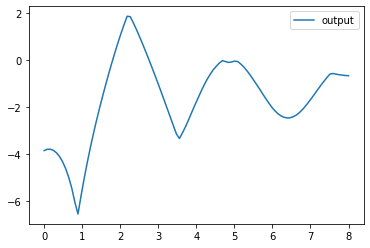

In [80]:
out = []
for i in range(len(x)):
  distance_adjusting.input['error'] = err[i]
  distance_adjusting.input['delta'] = dlt[i]
  # Crunch the numbers
  distance_adjusting.compute()
  d = distance_adjusting.output['output']
  out.append(d)


plt.plot(t, out, label='output')
plt.legend()
plt.show() 


  

The output says the amount of velocity the back car should add at each momment in order to maintain the distance.
خروجی ما در واقع مقداری از سرعت است که ماشین پشتی باید به سرعتش بیفزاید یا بکاهد.